In [68]:
#Loading The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

#Libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Libraries for various model parameter selection.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import scikitplot as skplt
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

# Helps predict the likelihood of cardiovascular disease.

In [69]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Master\\AI Trí tuệ nhân tạo\\data\\heart.csv")

In [70]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# PreProcess

In [71]:
# Find a duplicate rows
duplicate_df = df[df.duplicated(keep='last')]
print(duplicate_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
962   52    1   0       108   233    1        1      147      0      0.1   
964   44    0   2       108   141    0        1      175      0      0.6   
975   39    1   0       118   219    0        1      140      0      1.2   
992   50    0   0       110   254    0        0      159      0      0.0   
997   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

In [72]:
#Drop duplicate rows
df = df.drop_duplicates(keep='last')
df.reset_index(inplace=True)
del df['index']
df.shape

(302, 14)

In [73]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
1,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
2,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
3,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
4,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
298,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
299,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
300,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Visualazition

Class=1, n=164 (54.305%)
Class=0, n=138 (45.695%)


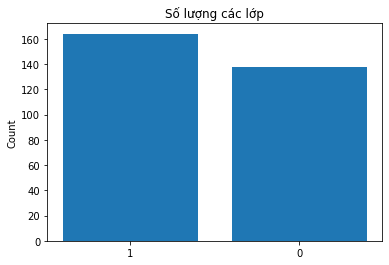

In [74]:
counter = Counter(df['target'])
for k,v in counter.items():
    per = v / len(df['target']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
key = ['1','0']
# creating the bar plot
plt.bar(key, list(counter.values()))
plt.ylabel("Count")
plt.title("Số lượng các lớp")
plt.show()

In [75]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

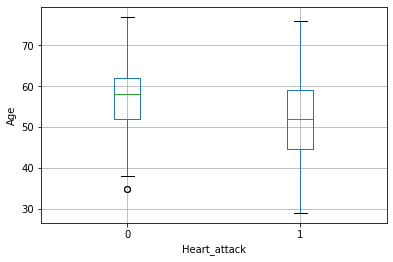

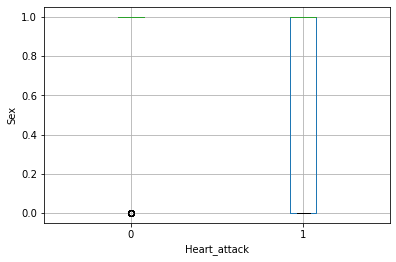

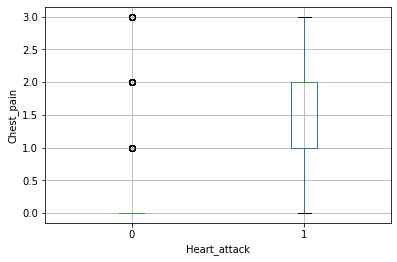

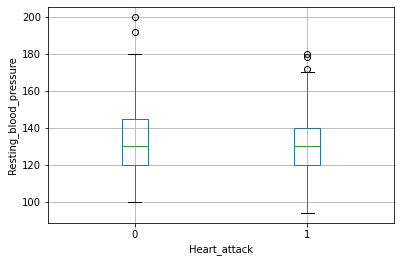

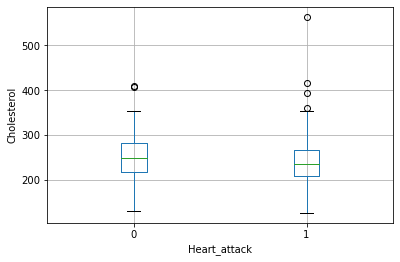

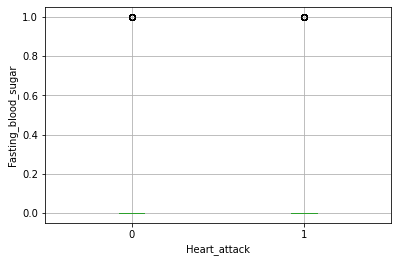

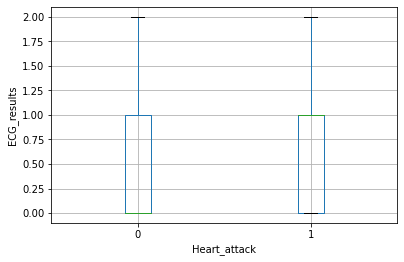

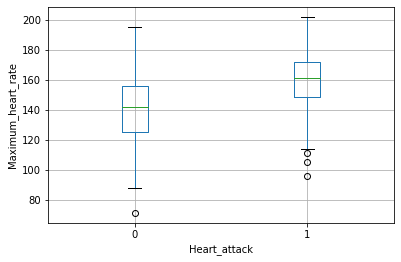

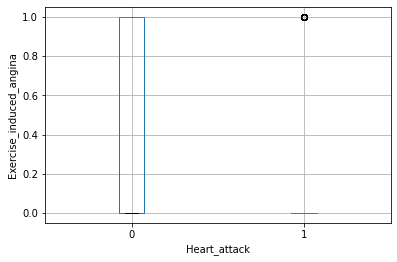

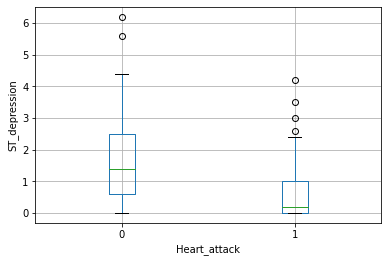

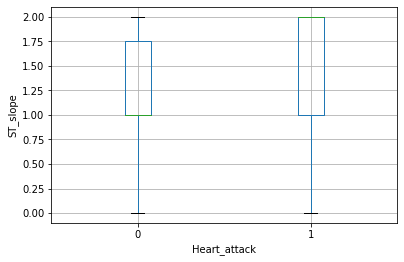

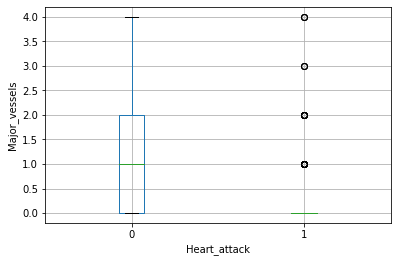

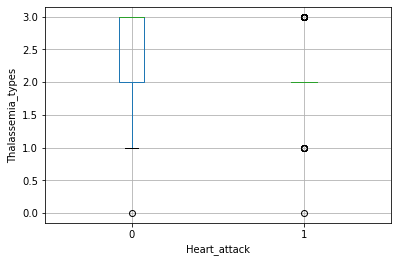

In [76]:
col= df.columns.tolist()[:-1]
for i in range(0 , len(col)) :
    ax = df.boxplot(column= col[i], by='Heart_attack')
    ax.set_ylabel(col[i])
    plt.suptitle('') # Suppress the titles
    plt.title('')

1    206
0     96
Name: Sex, dtype: int64


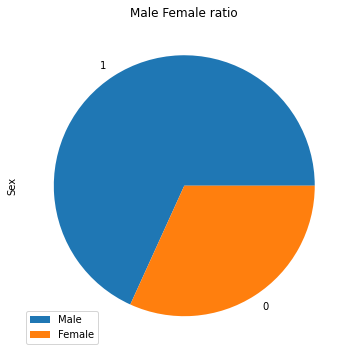

In [77]:
#First look at the number of Males and Females in the data
print(df.Sex.value_counts())
df.Sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']);

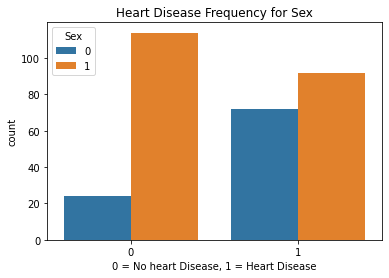

In [78]:
#Check if the number of heart diseases compared to gender:
sns.countplot(x = 'Heart_attack', data = df, hue = 'Sex')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease");

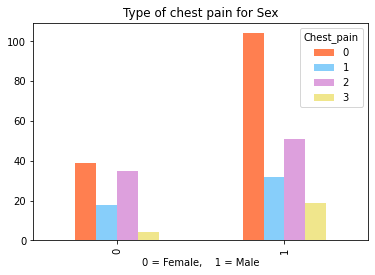

In [79]:
#Check to see if the type of chest pain is influenced by gender:
pd.crosstab(df.Sex, df.Chest_pain).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for Sex')
plt.xlabel('0 = Female,    1 = Male');

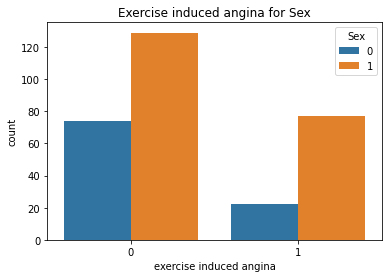

In [80]:
#Exercise causes angina in men and women:
sns.countplot(x = 'Exercise_induced_angina', data = df, hue = 'Sex')
plt.title('Exercise induced angina for Sex')
plt.xlabel('exercise induced angina');

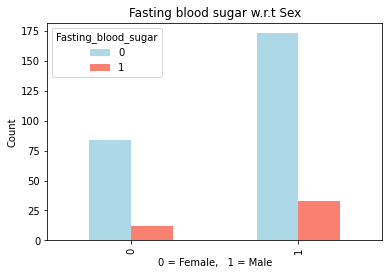

In [81]:
#Blood sugar index between men and women
pd.crosstab(df.Sex, df.Fasting_blood_sugar).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t Sex")
plt.xlabel("0 = Female,   1 = Male")
plt.ylabel("Count");

In [82]:
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
1,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
2,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
3,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
4,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0


In [83]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

# Check importan of features

In [107]:
x = df.drop(['Heart_attack'], axis = 1)
y = df['Heart_attack']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 10)
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

In [108]:
x_test

array([[0.4375    , 1.        , 0.        , 0.47169811, 0.16894977,
        0.        , 0.        , 0.41984733, 1.        , 0.14516129,
        0.5       , 0.        , 1.        ],
       [0.8125    , 1.        , 0.66666667, 0.22641509, 0.34474886,
        0.        , 0.5       , 0.61068702, 0.        , 0.16129032,
        1.        , 0.25      , 1.        ],
       [0.77083333, 0.        , 0.        , 0.79245283, 0.23287671,
        1.        , 0.5       , 0.71755725, 1.        , 0.16129032,
        0.5       , 0.5       , 1.        ],
       [0.52083333, 1.        , 0.66666667, 0.52830189, 0.24200913,
        0.        , 0.        , 0.71755725, 0.        , 0.25806452,
        1.        , 0.        , 1.        ],
       [0.29166667, 0.        , 0.66666667, 0.26415094, 0.19863014,
        0.        , 0.5       , 0.71755725, 0.        , 0.03225806,
        0.5       , 0.        , 0.66666667],
       [0.52083333, 1.        , 0.33333333, 0.13207547, 0.41780822,
        0.        , 0.5    

In [85]:
reg = RandomForestRegressor()
reg.fit(x, y)

RandomForestRegressor()

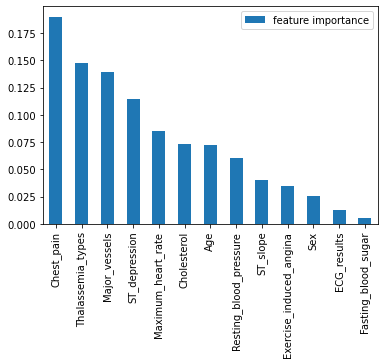

In [86]:
col= df.columns.tolist()[:-1]
df_feature_importance = pd.DataFrame(reg.feature_importances_, index=col, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

In [87]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=10)

# fit model on all training data
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = RF.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(RF.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(RF, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = RandomForestClassifier(n_estimators=50)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 85.25%
Thresh=0.011, n=13, Accuracy: 81.97%
Thresh=0.023, n=12, Accuracy: 83.61%
Thresh=0.029, n=11, Accuracy: 81.97%
Thresh=0.054, n=10, Accuracy: 78.69%
Thresh=0.064, n=9, Accuracy: 77.05%
Thresh=0.070, n=8, Accuracy: 77.05%
Thresh=0.086, n=7, Accuracy: 81.97%
Thresh=0.087, n=6, Accuracy: 75.41%
Thresh=0.089, n=5, Accuracy: 72.13%
Thresh=0.090, n=4, Accuracy: 80.33%
Thresh=0.107, n=3, Accuracy: 67.21%
Thresh=0.142, n=2, Accuracy: 65.57%
Thresh=0.148, n=1, Accuracy: 54.10%


Boxplot, importan => delete "Fasting_blood_sugar"

# Split data 

In [120]:
x = df.drop(['Heart_attack', 'Fasting_blood_sugar'], axis = 1)
y = df['Heart_attack']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

In [122]:
len(x_train[0])

12

# Check the suitability of the algorithms to the data

>Logistic 0.840 (0.058)
>DTree 0.772 (0.071)
>RandomForest 0.820 (0.054)
>KNN 0.641 (0.098)
>SVC 0.709 (0.123)


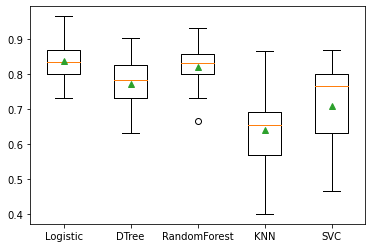

In [22]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
def get_models():
    models, names = list(), list()
    # LogisticRegression
    models.append(LogisticRegression())
    names.append('Logistic')
    # DecisionTreeClassifier
    models.append(DecisionTreeClassifier())
    names.append('DTree')
    # RF
    models.append(RandomForestClassifier())
    names.append('RandomForest')
    # KNeighborsClassifier
    models.append(KNeighborsClassifier())
    names.append('KNN')
    # LinearSVC
    models.append(LinearSVC())
    names.append('SVC')              
    return models, names
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    #evaluate the model and store results
    scores = evaluate_model(x, y, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Lựa chọn thuật toán

In [23]:
accuracy_train = []
accuracy_test = []
recall_model = []

# Tuning thuật toán Logistic Regression

In [24]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 30, 20, 10, 1.0, 0.1, 0.01]
penalty = ['l2']
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842556 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838333 (0.077388) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838333 (0.077388) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.838333 (0.077388) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.838389 (0.076428) with: {'C': 30, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838389 (0.076428) with: {'C': 30, 'penalty': 'l2', 'solver': 'lbfgs'}
0.842500 (0.077380) with: {'C': 30, 'penalty': 'l2', 'solver': 'liblinear'}
0.841167 (0.078439) with: {'C': 20, 'penalty': 'l2', 'solver': 'newton-cg'}
0.841167 (0.078439) with: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
0.841167 (0.074659) with: {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}
0.842556 (0.075656) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.842556 (0.075656) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.841167 (0.076193) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.832889 (0.081463) with: {'C'

In [25]:
model1 = LogisticRegression(C = 10  , solver = 'newton-cg', penalty = 'l2')
model1.fit(x_train,y_train)
accuracy_train1 = model1.score(x_train,y_train)
accuracy_train.append(accuracy_train1)
accuracy_test1 = model1.score(x_test,y_test)
accuracy_test.append(accuracy_test1)
y_pred = model1.predict(x_test)
recall1 = recall_score(y_test,y_pred)
recall_model.append(recall1)
print('Logistic Regression Accuracy -->',((accuracy_test1)*100))
print(recall1)

Logistic Regression Accuracy --> 81.9672131147541
0.8888888888888888


# # Decision Trees

In [26]:
model = DecisionTreeClassifier()
criterions = ['gini','entropy']
splitters = ['best','random']
# define grid search
grid = dict(criterion=criterions,splitter=splitters)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.738444 using {'criterion': 'entropy', 'splitter': 'random'}
0.727500 (0.111634) with: {'criterion': 'gini', 'splitter': 'best'}
0.730333 (0.103981) with: {'criterion': 'gini', 'splitter': 'random'}
0.717667 (0.106360) with: {'criterion': 'entropy', 'splitter': 'best'}
0.738444 (0.086485) with: {'criterion': 'entropy', 'splitter': 'random'}


In [88]:
model2 = DecisionTreeClassifier(criterion = 'entropy',splitter = 'random' )
model2.fit(x_train,y_train)
accuracy_train2 = model2.score(x_train,y_train)
accuracy_train.append(accuracy_train2)
accuracy_test2 = model2.score(x_test,y_test)
accuracy_test.append(accuracy_test2)
y_pred = model2.predict(x_test)
recall2 = recall_score(y_test,y_pred)
recall_model.append(recall2)
print('Decision Tree Accuracy -->',((accuracy_test2)*100))
print(recall2)

Decision Tree Accuracy --> 75.40983606557377
0.7407407407407407


# Support Vector Classification.

In [28]:
model = LinearSVC()
penaltys = ['l1','l2']
C = [0.01,0.1,1,5,10,15,20]
loss = ['hinge','squared_hinge']
# define grid search
grid = dict(penalty=penaltys,C=C,loss =loss )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.845278 using {'C': 5, 'loss': 'squared_hinge', 'penalty': 'l2'}


In [123]:
model3 = LinearSVC(C = 5,loss = 'squared_hinge',penalty = 'l2')
model3.fit(x_train,y_train)
accuracy_train3 = model3.score(x_train,y_train)
accuracy_train.append(accuracy_train3)
accuracy_test3 = model3.score(x_test,y_test)
accuracy_test.append(accuracy_test3)
y_pred = model3.predict(x_test)
recall3 = recall_score(y_test,y_pred)
recall_model.append(recall3)
print('SVM Classifier Accuracy -->',((accuracy_test3)*100))


SVM Classifier Accuracy --> 83.60655737704919


In [30]:
print(recall3)

0.9629629629629629


# # Random Forest Classifier

In [31]:
model = RandomForestClassifier()
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
random_state = [5]
# define grid search
grid = dict(n_estimators=n_estimators,criterion=criterion,max_features =max_features,random_state = random_state )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.812167 using {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 750, 'random_state': 5}


In [32]:
model4 = RandomForestClassifier(criterion = 'entropy',max_features = 'auto',n_estimators = 750, random_state = 5)
model4.fit(x_train,y_train)
accuracy_train4 = model4.score(x_train,y_train)
accuracy_train.append(accuracy_train4)
accuracy_test4 = model4.score(x_test,y_test)
accuracy_test.append(accuracy_test4)
y_pred = model4.predict(x_test)
recall4 = recall_score(y_test,y_pred)
recall_model.append(recall4)
print('Random Forest Classifier Accuracy -->',((accuracy_test4)*100))
print(recall4)

Random Forest Classifier Accuracy --> 83.60655737704919
0.8888888888888888


# # K-Nearest Neighbors

In [33]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.828778 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


In [34]:
model5 = KNeighborsClassifier(metric ='manhattan',  n_neighbors = 19, weights = 'uniform')
model5.fit(x_train,y_train)
accuracy_train5 = model5.score(x_train,y_train)
accuracy_train.append(accuracy_train5)
accuracy_test5 = model5.score(x_test,y_test)
accuracy_test.append(accuracy_test5)
y_pred = model5.predict(x_test)
recall5 = recall_score(y_test,y_pred)
recall_model.append(recall5)
# accuracy.append(accuracy8)
print('Gradient Boosting Classifier Accuracy -->',((accuracy_test5)*100))
print(recall5)

Gradient Boosting Classifier Accuracy --> 85.24590163934425
0.9259259259259259


In [35]:
Models = ['Logistic Regression','Decision Tree','SVC','Random Forest Classifier','K-Nearest Neighbors']
total_v1 = list(zip(Models,accuracy_train,accuracy_test,recall_model))
output_v1 = pd.DataFrame(total_v1, columns = ['Models','Accuracy_train','Accuracy_test','Recall'])

In [36]:
output_v1

,Models,Accuracy_train,Accuracy_test,Recall
0,Logistic Regression,0.863071,0.819672,0.888889
1,Decision Tree,1.000000,0.721311,0.703704
2,SVC,0.879668,0.836066,0.962963
3,Random Forest Classifier,1.000000,0.836066,0.888889
4,K-Nearest Neighbors,0.838174,0.852459,0.925926


In [37]:
s_v1 = output_v1.groupby(['Models'])['Accuracy_train','Accuracy_test','Recall'].mean().reset_index().sort_values(by='Accuracy_test',ascending=False)
s_v1.head(10).style.background_gradient(cmap='Reds')

,Models,Accuracy_train,Accuracy_test,Recall
1,K-Nearest Neighbors,0.838174,0.852459,0.925926
3,Random Forest Classifier,1.000000,0.836066,0.888889
4,SVC,0.879668,0.836066,0.962963
2,Logistic Regression,0.863071,0.819672,0.888889
0,Decision Tree,1.000000,0.721311,0.703704


RandomForest và Decision Tree cho thấy 2 mô hình này bị overfit

# Model Selection and Training

In [112]:
dummy_variable1 = pd.get_dummies(df.Chest_pain)
dummy_variable2 = pd.get_dummies(df.Thalassemia_types)
dummy_variable3 = pd.get_dummies(df.ECG_results)
dummy_variable4 = pd.get_dummies(df.ST_slope)
dummy_variable5 = pd.get_dummies(df.Major_vessels)
df_after_dummy = pd.concat([df,dummy_variable1,dummy_variable2,dummy_variable3,dummy_variable4,dummy_variable5],axis = 'columns')

In [113]:
dummy_variable1

,0,1,2,3
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
297,0,1,0,0
298,1,0,0,0
299,1,0,0,0
300,1,0,0,0


In [39]:
df_after_dummy

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,...,1,2,0,1,2,0,1,2,3,4
0,47,1,2,138,257,0,0,156,0,0.0,...,0,0,0,0,1,1,0,0,0,0
1,54,1,1,108,309,0,1,156,0,0.0,...,1,0,0,0,1,1,0,0,0,0
2,64,1,3,110,211,0,0,144,1,1.8,...,0,0,0,1,0,1,0,0,0,0
3,59,1,2,150,212,1,1,157,0,1.6,...,1,0,0,0,1,1,0,0,0,0
4,67,1,0,100,299,0,0,125,1,0.9,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,1,140,221,0,1,164,1,0.0,...,1,0,0,0,1,1,0,0,0,0
298,60,1,0,125,258,0,0,141,1,2.8,...,0,0,0,1,0,0,1,0,0,0
299,47,1,0,110,275,0,0,118,1,1.0,...,0,0,0,1,0,0,1,0,0,0
300,50,0,0,110,254,0,0,159,0,0.0,...,0,0,0,0,1,1,0,0,0,0


Create dummy variables for data to increase accuracy

In [100]:
final = df_after_dummy.drop(['Chest_pain','Thalassemia_types','ECG_results','ST_slope','Major_vessels'],axis = 1)
final.head()

,Age,Sex,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Maximum_heart_rate,Exercise_induced_angina,ST_depression,Heart_attack,0,...,1,2,0,1,2,0,1,2,3,4
0,47,1,138,257,0,156,0,0.0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,54,1,108,309,0,156,0,0.0,1,0,...,1,0,0,0,1,1,0,0,0,0
2,64,1,110,211,0,144,1,1.8,1,0,...,0,0,0,1,0,1,0,0,0,0
3,59,1,150,212,1,157,0,1.6,1,0,...,1,0,0,0,1,1,0,0,0,0
4,67,1,100,299,0,125,1,0.9,0,1,...,0,0,0,1,0,0,0,1,0,0


In [101]:
final

,Age,Sex,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Maximum_heart_rate,Exercise_induced_angina,ST_depression,Heart_attack,0,...,1,2,0,1,2,0,1,2,3,4
0,47,1,138,257,0,156,0,0.0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,54,1,108,309,0,156,0,0.0,1,0,...,1,0,0,0,1,1,0,0,0,0
2,64,1,110,211,0,144,1,1.8,1,0,...,0,0,0,1,0,1,0,0,0,0
3,59,1,150,212,1,157,0,1.6,1,0,...,1,0,0,0,1,1,0,0,0,0
4,67,1,100,299,0,125,1,0.9,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,140,221,0,164,1,0.0,1,0,...,1,0,0,0,1,1,0,0,0,0
298,60,1,125,258,0,141,1,2.8,0,1,...,0,0,0,1,0,0,1,0,0,0
299,47,1,110,275,0,118,1,1.0,0,1,...,0,0,0,1,0,0,1,0,0,0
300,50,0,110,254,0,159,0,0.0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [102]:
x = final.drop(['Heart_attack'], axis = 1)
y = final['Heart_attack']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

In [111]:
x_train

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types
145,45,1,0,115,260,0,0,185,0,0.0,2,0,2
161,56,1,0,132,184,0,0,105,1,2.1,1,1,1
98,66,0,3,150,226,0,1,114,0,2.6,0,0,2
123,34,0,1,118,210,0,1,192,0,0.7,2,0,2
11,77,1,0,125,304,0,0,162,1,0.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,66,1,0,120,302,0,0,151,0,0.4,1,0,2
73,56,1,0,130,283,1,0,103,1,1.6,0,0,3
118,63,1,0,140,187,0,0,144,1,4.0,2,2,3
189,60,0,0,150,258,0,0,157,0,2.6,1,2,3


In [104]:
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

In [109]:
x_train

array([[0.625     , 1.        , 0.66666667, ..., 0.5       , 0.25      ,
        0.33333333],
       [0.54166667, 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.66666667],
       [0.83333333, 0.        , 1.        , ..., 1.        , 0.5       ,
        0.66666667],
       ...,
       [0.5625    , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.72916667, 0.        , 0.        , ..., 0.5       , 0.5       ,
        0.66666667],
       [0.54166667, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667]])

In [45]:
accuracy_train = []
accuracy_test = []
recall_model = []

# Logistic Regression

In [46]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 30, 20, 10, 1.0, 0.1, 0.01]
penalty = ['l2']
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831333 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.819111 (0.081690) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.819111 (0.081690) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.819111 (0.081690) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.820556 (0.082090) with: {'C': 30, 'penalty': 'l2', 'solver': 'newton-cg'}
0.820556 (0.082090) with: {'C': 30, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820611 (0.081907) with: {'C': 30, 'penalty': 'l2', 'solver': 'liblinear'}
0.824611 (0.076384) with: {'C': 20, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824611 (0.076384) with: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821889 (0.076577) with: {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}
0.823167 (0.072063) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823167 (0.072063) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824556 (0.068612) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.831333 (0.065102) with: {'C

In [47]:
model1 = LogisticRegression(C = 1.0  , solver = 'newton-cg', penalty = 'l2')
model1.fit(x_train,y_train)
accuracy_train1 = model1.score(x_train,y_train)
accuracy_train.append(accuracy_train1)
accuracy_test1 = model1.score(x_test,y_test)
accuracy_test.append(accuracy_test1)
y_pred = model1.predict(x_test)
recall1 = recall_score(y_test,y_pred)
recall_model.append(recall1)
print('Logistic Regression Accuracy -->',((accuracy_test1)*100))
print(recall1)

Logistic Regression Accuracy --> 90.1639344262295
0.9459459459459459


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

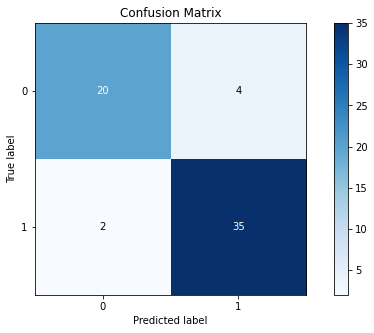

In [48]:
pred1 = model1.predict(x_test)
matrix1 = (y_test,pred1)
skplt.metrics.plot_confusion_matrix(y_test, pred1,figsize=(10,5))

# Decision Trees

In [49]:
model = DecisionTreeClassifier()
criterions = ['gini','entropy']
splitters = ['best','random']
# define grid search
grid = dict(criterion=criterions,splitter=splitters)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753833 using {'criterion': 'gini', 'splitter': 'random'}
0.752667 (0.084551) with: {'criterion': 'gini', 'splitter': 'best'}
0.753833 (0.107574) with: {'criterion': 'gini', 'splitter': 'random'}
0.752611 (0.098635) with: {'criterion': 'entropy', 'splitter': 'best'}
0.742778 (0.068836) with: {'criterion': 'entropy', 'splitter': 'random'}


In [89]:
model2 = DecisionTreeClassifier(criterion = 'gini',splitter = 'random' )
model2.fit(x_train,y_train)
accuracy_train2 = model2.score(x_train,y_train)
accuracy_train.append(accuracy_train2)
accuracy_test2 = model2.score(x_test,y_test)
accuracy_test.append(accuracy_test2)
y_pred = model2.predict(x_test)
recall2 = recall_score(y_test,y_pred)
recall_model.append(recall2)
print('Decision Tree Accuracy -->',((accuracy_test2)*100))
print(recall2)

Decision Tree Accuracy --> 73.77049180327869
0.7777777777777778


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

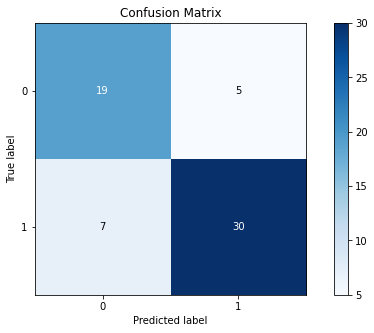

In [51]:
pred2 = model2.predict(x_test)
matrix2 = (y_test,pred2)
skplt.metrics.plot_confusion_matrix(y_test ,pred2 ,figsize=(10,5))

# SVC

In [52]:
model = LinearSVC()
penaltys = ['l1','l2']
C = [0.01,0.1,1,5,10,15,20]
loss = ['hinge','squared_hinge']
# define grid search
grid = dict(penalty=penaltys,C=C,loss =loss )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834056 using {'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}


In [53]:
model3 = LinearSVC(C =0.1,loss = 'squared_hinge',penalty = 'l2')
model3.fit(x_train,y_train)
accuracy_train3 = model3.score(x_train,y_train)
accuracy_train.append(accuracy_train3)
accuracy_test3 = model3.score(x_test,y_test)
accuracy_test.append(accuracy_test3)
y_pred = model3.predict(x_test)
recall3 = recall_score(y_test,y_pred)
recall_model.append(recall3)
print('SVM Classifier Accuracy -->',((accuracy_test3)*100))


SVM Classifier Accuracy --> 91.80327868852459


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

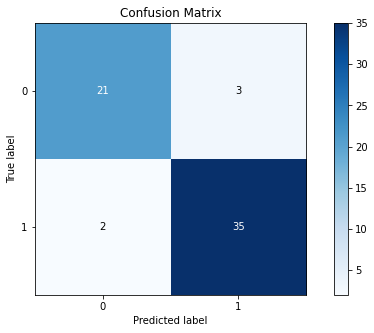

In [54]:
pred3 = model3.predict(x_test)
matrix3 = (y_test,pred3)
skplt.metrics.plot_confusion_matrix(y_test ,pred3 ,figsize=(10,5))

# Random Forest Classifier

In [55]:
model = RandomForestClassifier()
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
random_state = [5]
# define grid search
grid = dict(n_estimators=n_estimators,criterion=criterion,max_features =max_features,random_state = random_state )
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834056 using {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000, 'random_state': 5}


In [56]:
model4 = RandomForestClassifier(criterion = 'entropy',max_features = 'log2',n_estimators = 1000, random_state = 5)
model4.fit(x_train,y_train)
accuracy_train4 = model4.score(x_train,y_train)
accuracy_train.append(accuracy_train4)
accuracy_test4 = model4.score(x_test,y_test)
accuracy_test.append(accuracy_test4)
y_pred = model4.predict(x_test)
recall4 = recall_score(y_test,y_pred)
recall_model.append(recall4)
print('Random Forest Classifier Accuracy -->',((accuracy_test4)*100))
print(recall4)

Random Forest Classifier Accuracy --> 86.88524590163934
0.8918918918918919


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

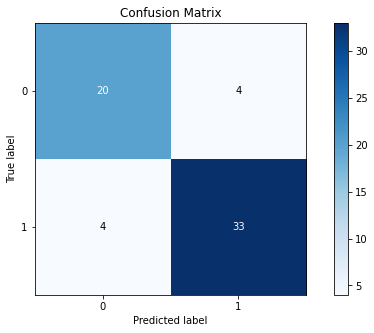

In [57]:
pred4 = model4.predict(x_test)
matrix4 = (y_test,pred4)
skplt.metrics.plot_confusion_matrix(y_test ,pred4 ,figsize=(10,5))

# K-Nearest Neighbors

In [58]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.833944 using {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}


In [59]:
model5 = KNeighborsClassifier(metric ='euclidean',  n_neighbors = 13, weights = 'distance')
model5.fit(x_train,y_train)
accuracy_train5 = model5.score(x_train,y_train)
accuracy_train.append(accuracy_train5)
accuracy_test5 = model5.score(x_test,y_test)
accuracy_test.append(accuracy_test5)
y_pred = model5.predict(x_test)
recall5 = recall_score(y_test,y_pred)
recall_model.append(recall5)
# accuracy.append(accuracy8)
print('Gradient Boosting Classifier Accuracy -->',((accuracy_test5)*100))
print(recall5)

Gradient Boosting Classifier Accuracy --> 91.80327868852459
0.918918918918919


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

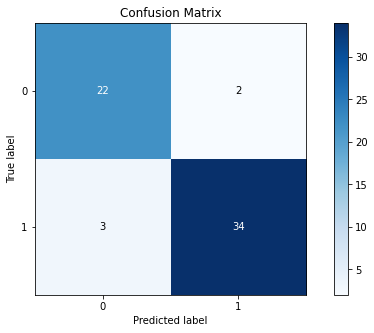

In [60]:
pred5 = model5.predict(x_test)
matrix5 = (y_test,pred5)
skplt.metrics.plot_confusion_matrix(y_test ,pred5 ,figsize=(10,5))

# Overall accuracies obtained by the models

In [61]:
Models = ['Logistic Regression','Decision Tree','SVC','Random Forest Classifier','K-Nearest Neighbors']
total_v2 = list(zip(Models,accuracy_train,accuracy_test,recall_model))
output_v2 = pd.DataFrame(total_v2, columns = ['Models','Accuracy_train','Accuracy_test','Recall'])

In [62]:
output_v2

,Models,Accuracy_train,Accuracy_test,Recall
0,Logistic Regression,0.858921,0.901639,0.945946
1,Decision Tree,1.000000,0.803279,0.810811
2,SVC,0.867220,0.918033,0.945946
3,Random Forest Classifier,1.000000,0.868852,0.891892
4,K-Nearest Neighbors,1.000000,0.918033,0.918919


In [63]:
s_v2 = output_v2.groupby(['Models'])['Accuracy_train','Accuracy_test','Recall'].mean().reset_index().sort_values(by='Accuracy_test',ascending=False)
s_v2.head(10).style.background_gradient(cmap='Reds')

,Models,Accuracy_train,Accuracy_test,Recall
1,K-Nearest Neighbors,1.000000,0.918033,0.918919
4,SVC,0.867220,0.918033,0.945946
2,Logistic Regression,0.858921,0.901639,0.945946
3,Random Forest Classifier,1.000000,0.868852,0.891892
0,Decision Tree,1.000000,0.803279,0.810811


Random Forest and Decision Tree : overfiting

In [64]:
result_s1s2 = pd.concat([s_v1,s_v2],axis = 'columns')

In [65]:
result_s1s2

,Models,Accuracy_train,Accuracy_test,Recall,Models,Accuracy_train,Accuracy_test,Recall
0,Decision Tree,1.000000,0.721311,0.703704,Decision Tree,1.000000,0.803279,0.810811
1,K-Nearest Neighbors,0.838174,0.852459,0.925926,K-Nearest Neighbors,1.000000,0.918033,0.918919
2,Logistic Regression,0.863071,0.819672,0.888889,Logistic Regression,0.858921,0.901639,0.945946
3,Random Forest Classifier,1.000000,0.836066,0.888889,Random Forest Classifier,1.000000,0.868852,0.891892
4,SVC,0.879668,0.836066,0.962963,SVC,0.867220,0.918033,0.945946


In [66]:
s_v1

,Models,Accuracy_train,Accuracy_test,Recall
1,K-Nearest Neighbors,0.838174,0.852459,0.925926
3,Random Forest Classifier,1.000000,0.836066,0.888889
4,SVC,0.879668,0.836066,0.962963
2,Logistic Regression,0.863071,0.819672,0.888889
0,Decision Tree,1.000000,0.721311,0.703704


In [67]:
s_v2

,Models,Accuracy_train,Accuracy_test,Recall
1,K-Nearest Neighbors,1.000000,0.918033,0.918919
4,SVC,0.867220,0.918033,0.945946
2,Logistic Regression,0.858921,0.901639,0.945946
3,Random Forest Classifier,1.000000,0.868852,0.891892
0,Decision Tree,1.000000,0.803279,0.810811
